# 13wk-1: 강화학습 (1) – Bandit

최규빈  
2024-05-28

<a href="https://colab.research.google.com/github/guebin/DL2025/blob/main/posts/13wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

In [1]:
# {{<video https://youtu.be/playlist?list=PLQqh36zP38-zEjn2m8H8hMCHsQK8udE27&si=Sy-lnw4Kq56SRggu >}}

# 2. Imports

In [2]:
import numpy as np

# 3. 강화학습 Intro

`-` 강화학습(대충설명): 어떠한 “(게임)환경”이 있을때 거기서 “뭘 할지”를
학습하는 과업

<figure class="margin-caption">
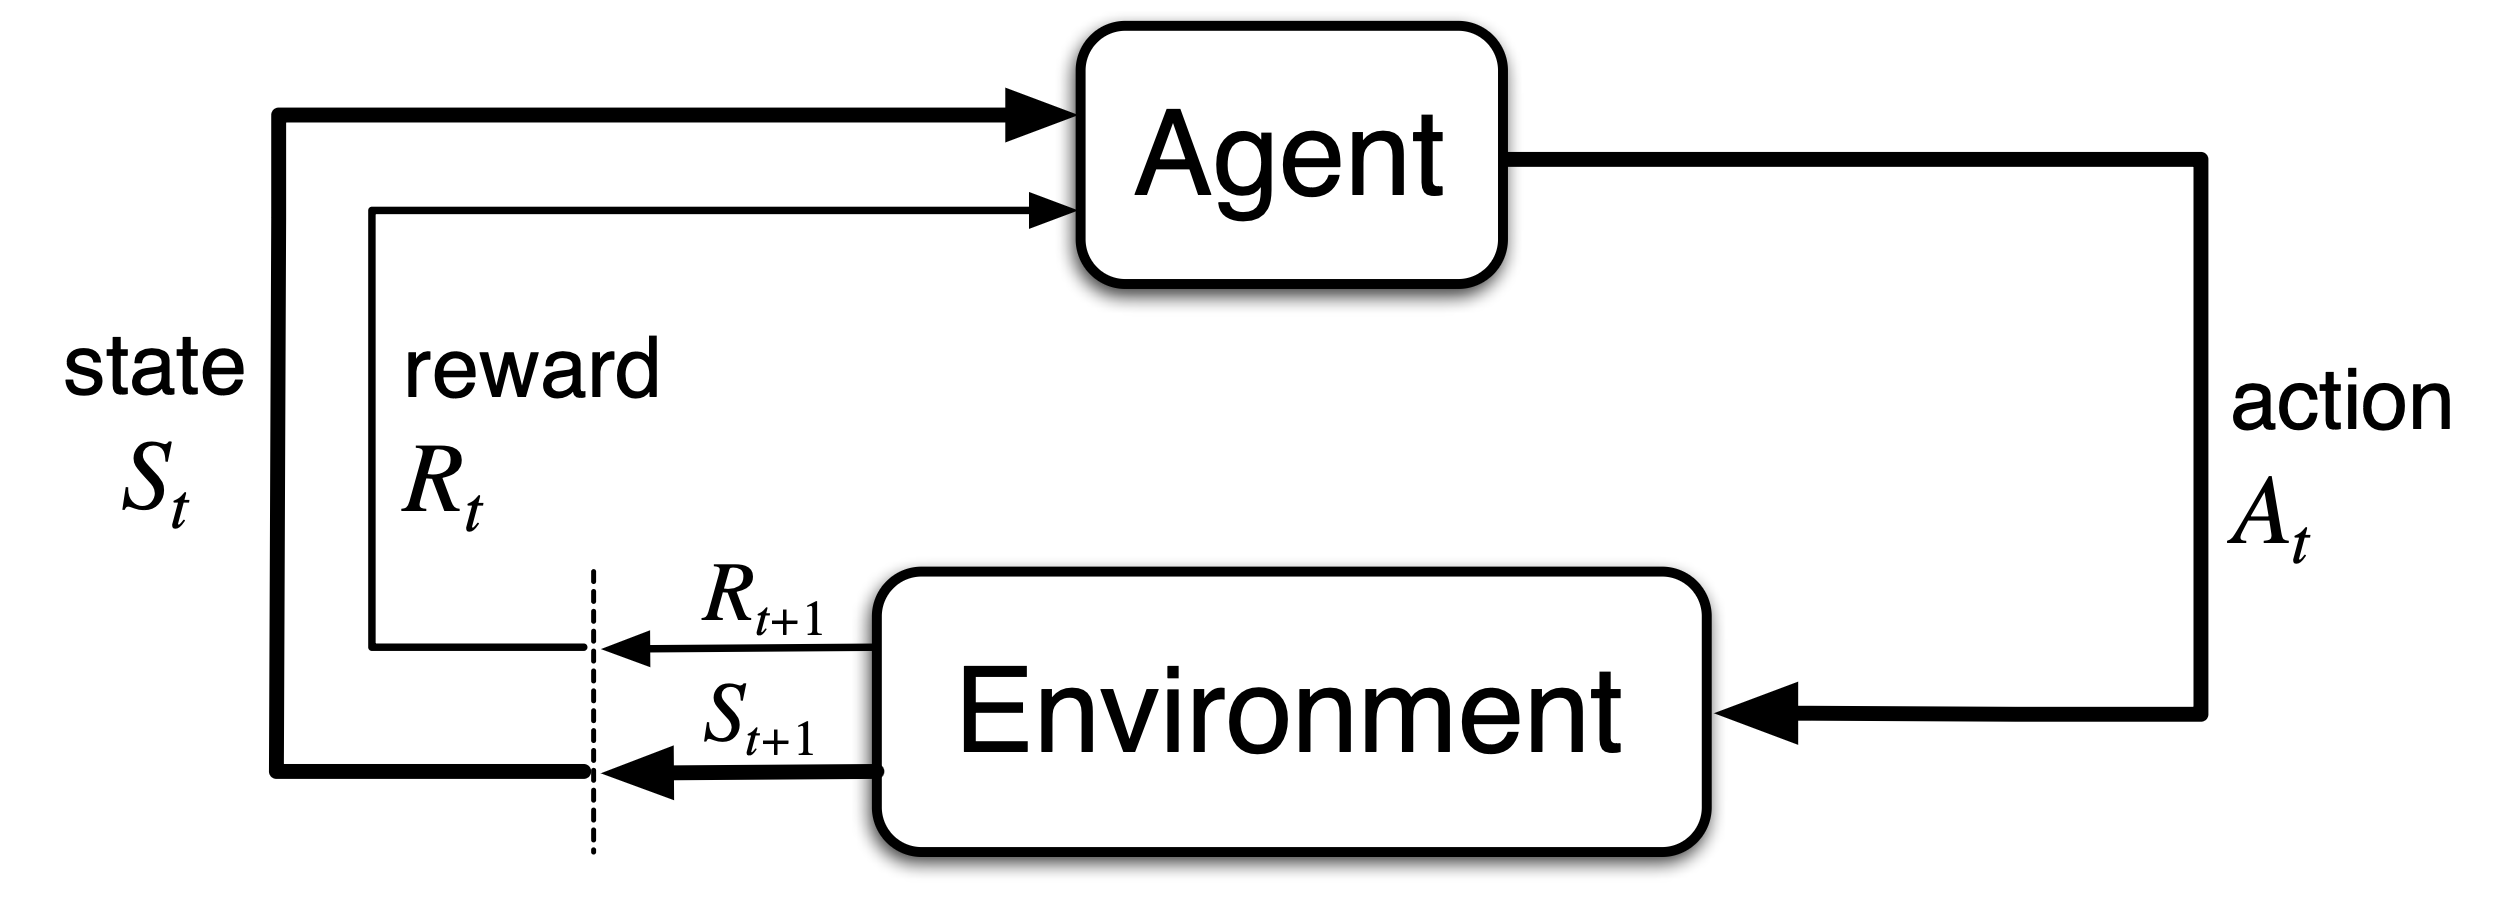
<figcaption aria-hidden="true">그림1: 셔튼(<span class="citation"
data-cites="sutton1998reinforcement">Sutton, Barto, et al.
(1998)</span>)의 교재에서 발췌한 그림, 되게 유명한
그림이에요</figcaption>
</figure>

`-` 딥마인드: breakout $\to$ 알파고

-   <https://www.youtube.com/watch?v=TmPfTpjtdgg>

<figure class="margin-caption">
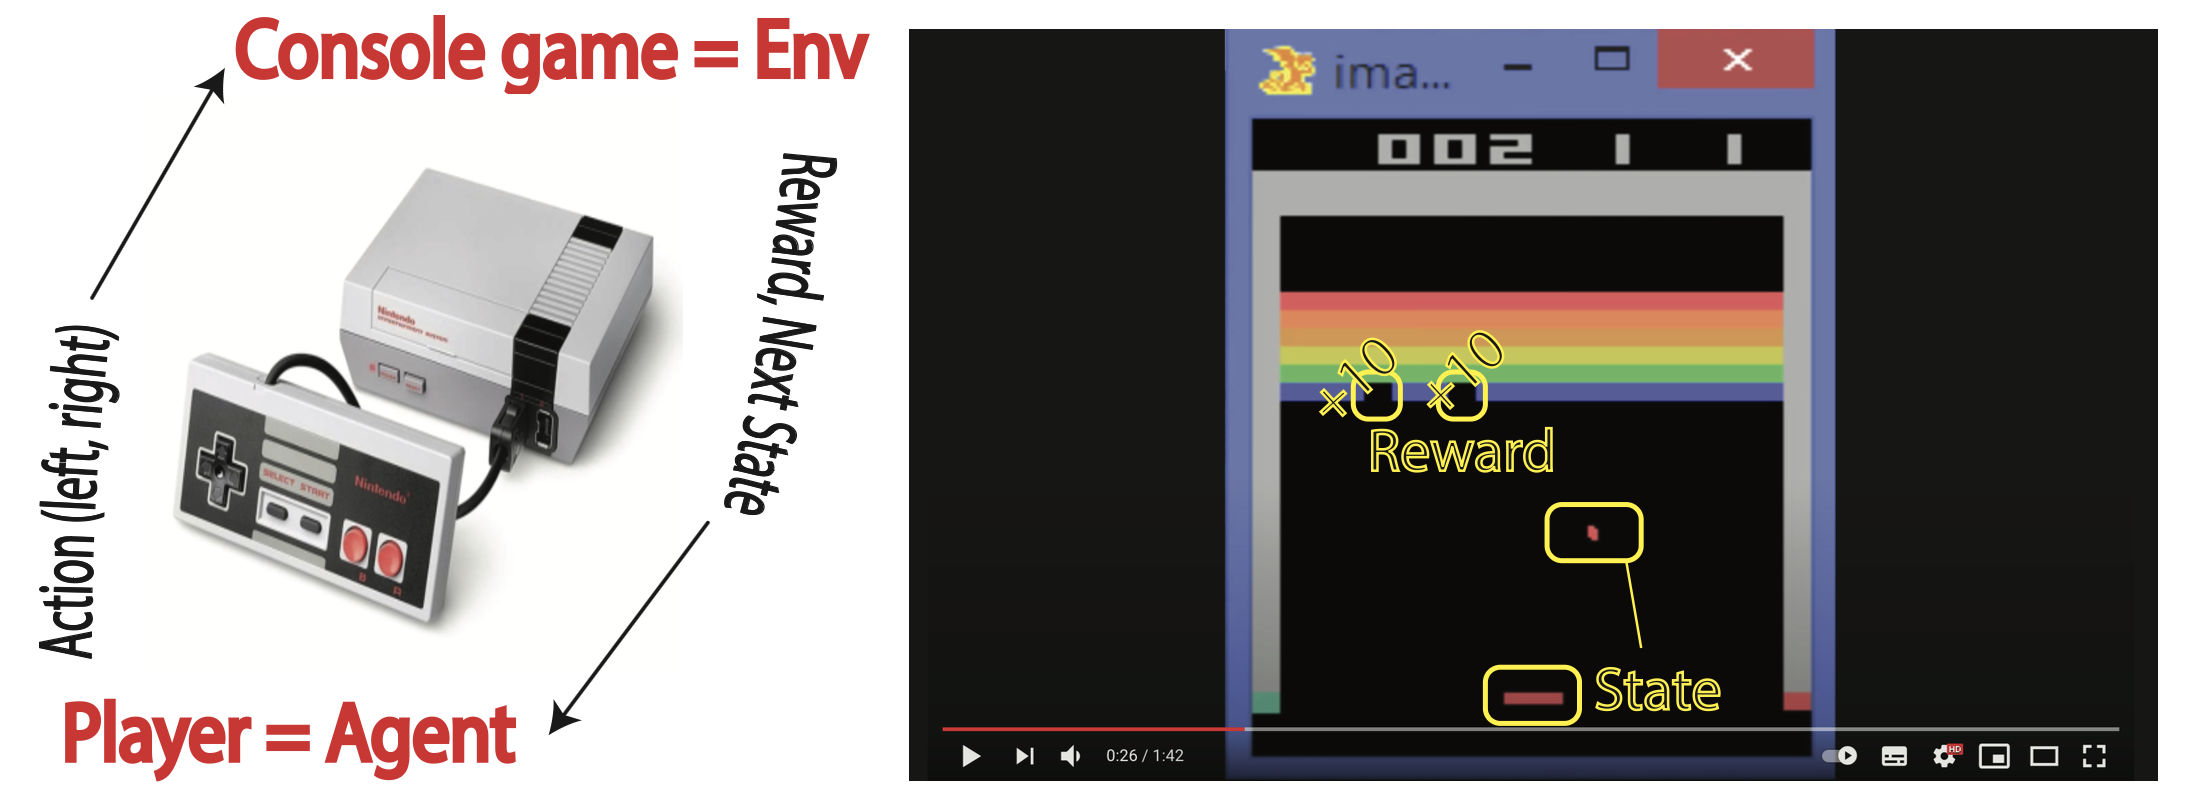
<figcaption aria-hidden="true">그림2: 벽돌깨기</figcaption>
</figure>

`-` 강화학습 미래? (이거 잘하면 먹고 살 수 있을까?)

# 4. Bandit 게임 설명 및 원시코드

`-` 문제설명: 두 개의 버튼이 있다. `버튼0`을 누르면 1의 보상을,
`버튼1`을 누르면 10의 보상을 준다고 가정

-   Agent: 버튼0을 누르거나,버튼1을 누르는 존재
-   Env: Agent의 Action을 바탕으로 Reward를 주는 존재

> 주의: 이 문제 상황에서 state는 없음

`-` 처음에 어떤 행동을 해야 하는가?

-   처음에는 아는게 없음
-   일단 “아무거나” 눌러보자.

`-` 버튼을 아무거나 누르는 코드를 작성해보자.

In [3]:
action_space = ['버튼0','버튼1']
action = np.random.choice(action_space,p=[0.5,0.5])
action

> `action_space` 와 `action` 이라는 용어를 기억할 것

`-` 버튼을 누른 행위에 따른 보상을 구현하자.

In [28]:
reward = 1 if action == "버튼0" else 10 
reward

> `reward`라는 용어를 기억할 것

`-` 아무버튼이나 10번정도 눌러보면서 데이터를 쌓아보자.

In [4]:
action_space = ['버튼0','버튼1']
for _ in range(10):
    action = np.random.choice(action_space)
    reward = 1 if action == "버튼0" else 10
    print(action,reward)

버튼1 10
버튼1 10
버튼1 10
버튼1 10
버튼0 1
버튼1 10
버튼0 1
버튼0 1
버튼1 10
버튼0 1

`-` 깨달았음: `버튼0`을 누르면 1점을 받고, `버튼1`을 누르면 10점을 받는
“환경(environment)”이구나? $\to$ `버튼1`을 누르는 “동작(=action)”을
해야하는 상황이구나?

-   여기에서 $\to$의 과정을 체계화 시킨 학문이 강화학습

> `environment`라는 용어를 기억할 것

In [5]:
action_space = ['버튼0','버튼1']
for _ in range(10):
    action = '버튼1'
    reward = 1 if action == "버튼0" else 10
    print(action,reward)

버튼1 10
버튼1 10
버튼1 10
버튼1 10
버튼1 10
버튼1 10
버튼1 10
버튼1 10
버튼1 10
버튼1 10

`-` 강화학습: 환경(environment)을 이해 $\to$ 에이전트(agent)가
행동(action)을 결정

> `agent`라는 용어를 기억할 것

***위의 과정이 잘 되었다는 의미로 사용하는 문장들***

-   강화학습이 성공적으로 잘 되었다.
-   에이전트가 환경의 과제를 완료했다.
-   에이전트가 환경에서 성공적으로 학습했다.
-   에이전트가 올바른 행동을 학습했다.
-   게임 클리어 (비공식)

`-` 게임이 클리어 되었다는 것을 의미하는 지표를 정하고 싶다.

-   단순한 생각: `버튼1`을 누르는 순간 게임클리어로 보면 되지 않나?
-   게임클리어조건: (1) 20번은 그냥 진행 (2) 최근 20번의 보상의 평균이
    9.5점 이상이면 게임이 클리어 되었다고 생각하자.[1]

`-` 원시코드1: 환경을 이해하지 못한 에이전트 – 게임을 클리어할 수 없다.

[1] `버튼1`을 눌러야 하는건 맞지만 몇번의 실수는 눈감아 주자는 의미

In [6]:
action_space = [0,1]
actions = []
rewards = []
for t in range(1,51):
    action = np.random.choice(action_space)
    reward = 1 if action == 0 else 10
    actions.append(action)
    rewards.append(reward)
    #--#
    print(
        f"시도:{t}\t"
        f"행동:{action}\t"
        f"보상:{reward}\t"
        f"최근20번보상평균:{np.mean(rewards[-20:]):.4f}\t"
    )
    if t<20:
        pass 
    elif t==20:
        print("--")
    else: 
        if np.mean(rewards[-20:]) > 9.5:
            print("Game Clear")
            break

시도:1    행동:1    보상:10   최근20번보상평균:10.0000   
시도:2    행동:0    보상:1    최근20번보상평균:5.5000    
시도:3    행동:0    보상:1    최근20번보상평균:4.0000    
시도:4    행동:0    보상:1    최근20번보상평균:3.2500    
시도:5    행동:0    보상:1    최근20번보상평균:2.8000    
시도:6    행동:0    보상:1    최근20번보상평균:2.5000    
시도:7    행동:1    보상:10   최근20번보상평균:3.5714    
시도:8    행동:1    보상:10   최근20번보상평균:4.3750    
시도:9    행동:0    보상:1    최근20번보상평균:4.0000    
시도:10   행동:1    보상:10   최근20번보상평균:4.6000    
시도:11   행동:1    보상:10   최근20번보상평균:5.0909    
시도:12   행동:1    보상:10   최근20번보상평균:5.5000    
시도:13   행동:1    보상:10   최근20번보상평균:5.8462    
시도:14   행동:1    보상:10   최근20번보상평균:6.1429    
시도:15   행동:1    보상:10   최근20번보상평균:6.4000    
시도:16   행동:1    보상:10   최근20번보상평균:6.6250    
시도:17   행동:0    보상:1    최근20번보상평균:6.2941    
시도:18   행동:1    보상:10   최근20번보상평균:6.5000    
시도:19   행동:0    보상:1    최근20번보상평균:6.2105    
시도:20   행동:0    보상:1    최근20번보상평균:5.9500    
--
시도:21   행동:0    보상:1    최근20번보상평균:5.5000    
시도:22   행동:0    보상:1    최근20번보상평균:5.5000    
시도:23  

`-` 원시코드2: 환경을 깨달은 에이전트 – 게임클리어

In [7]:
action_space = [0,1]
actions = []
rewards = []
for t in range(1,51):
    action = 1
    reward = 1 if action == 0 else 10
    actions.append(action)
    rewards.append(reward)
    #--#
    print(
        f"시도:{t}\t"
        f"행동:{action}\t"
        f"보상:{reward}\t"
        f"최근20번보상평균:{np.mean(rewards[-20:]):.4f}\t"
    )
    if t<20:
        pass 
    elif t==20:
        print("--")
    else: 
        if np.mean(rewards[-20:]) > 9.5:
            print("Game Clear")
            break

시도:1    행동:1    보상:10   최근20번보상평균:10.0000   
시도:2    행동:1    보상:10   최근20번보상평균:10.0000   
시도:3    행동:1    보상:10   최근20번보상평균:10.0000   
시도:4    행동:1    보상:10   최근20번보상평균:10.0000   
시도:5    행동:1    보상:10   최근20번보상평균:10.0000   
시도:6    행동:1    보상:10   최근20번보상평균:10.0000   
시도:7    행동:1    보상:10   최근20번보상평균:10.0000   
시도:8    행동:1    보상:10   최근20번보상평균:10.0000   
시도:9    행동:1    보상:10   최근20번보상평균:10.0000   
시도:10   행동:1    보상:10   최근20번보상평균:10.0000   
시도:11   행동:1    보상:10   최근20번보상평균:10.0000   
시도:12   행동:1    보상:10   최근20번보상평균:10.0000   
시도:13   행동:1    보상:10   최근20번보상평균:10.0000   
시도:14   행동:1    보상:10   최근20번보상평균:10.0000   
시도:15   행동:1    보상:10   최근20번보상평균:10.0000   
시도:16   행동:1    보상:10   최근20번보상평균:10.0000   
시도:17   행동:1    보상:10   최근20번보상평균:10.0000   
시도:18   행동:1    보상:10   최근20번보상평균:10.0000   
시도:19   행동:1    보상:10   최근20번보상평균:10.0000   
시도:20   행동:1    보상:10   최근20번보상평균:10.0000   
--
시도:21   행동:1    보상:10   최근20번보상평균:10.0000   
Game Clear

# 5. `Env`

`-` `Bandit` 클래스 선언 + `.step()` 구현

In [8]:
class Bandit:
    def step(self,agent_action):
        reward = 1 if agent_action == 0 else 10
        return reward

In [9]:
env = Bandit()
action_space = [0,1]
actions = []
rewards = []
for t in range(1,51):
    action = np.random.choice(action_space)
    reward = env.step(action)
    actions.append(action)
    rewards.append(reward)
    #--#
    print(
        f"시도:{t}\t"
        f"행동:{action}\t"
        f"보상:{reward}\t"
        f"최근20번보상평균:{np.mean(rewards[-20:]):.4f}\t"
    )
    if t<20:
        pass 
    elif t==20:
        print("--")
    else: 
        if np.mean(rewards[-20:]) > 9.5:
            print("Game Clear")
            break

시도:1    행동:0    보상:1    최근20번보상평균:1.0000    
시도:2    행동:0    보상:1    최근20번보상평균:1.0000    
시도:3    행동:0    보상:1    최근20번보상평균:1.0000    
시도:4    행동:0    보상:1    최근20번보상평균:1.0000    
시도:5    행동:1    보상:10   최근20번보상평균:2.8000    
시도:6    행동:1    보상:10   최근20번보상평균:4.0000    
시도:7    행동:1    보상:10   최근20번보상평균:4.8571    
시도:8    행동:1    보상:10   최근20번보상평균:5.5000    
시도:9    행동:0    보상:1    최근20번보상평균:5.0000    
시도:10   행동:1    보상:10   최근20번보상평균:5.5000    
시도:11   행동:1    보상:10   최근20번보상평균:5.9091    
시도:12   행동:0    보상:1    최근20번보상평균:5.5000    
시도:13   행동:1    보상:10   최근20번보상평균:5.8462    
시도:14   행동:1    보상:10   최근20번보상평균:6.1429    
시도:15   행동:1    보상:10   최근20번보상평균:6.4000    
시도:16   행동:0    보상:1    최근20번보상평균:6.0625    
시도:17   행동:1    보상:10   최근20번보상평균:6.2941    
시도:18   행동:1    보상:10   최근20번보상평균:6.5000    
시도:19   행동:0    보상:1    최근20번보상평균:6.2105    
시도:20   행동:0    보상:1    최근20번보상평균:5.9500    
--
시도:21   행동:0    보상:1    최근20번보상평균:5.9500    
시도:22   행동:1    보상:10   최근20번보상평균:6.4000    
시도:23  

# 6. `Agent`

## A. action을 인간이정함

`-` Agent 클래스 설계

-   액션을 하고, 본인의 행동과 환경에서 받은 reward를 기억
-   `.act()`함수와 `.save_experience()`함수 구현

In [35]:
class Agent:
    def __init__(self):
        self.action_space = [0,1]
        self.action = None 
        self.reward = None
        self.actions = []
        self.rewards = [] 
    def act(self):
        prob = [0.5, 0.5]
        self.action = 1 #np.random.choice(self.action_space,p=prob)
    def save_experience(self):
        self.actions.append(self.action)
        self.rewards.append(self.reward)

— 대충 아래와 같은 느낌으로 코드가 돌아가요 —

**시점0**: init

In [36]:
agent = Agent()
env = Bandit()

In [37]:
agent.action, agent.reward, agent.actions, agent.rewards

**시점1**: agent 가 acition을 선택

In [38]:
agent.act()

In [39]:
agent.action, agent.reward, agent.actions, agent.rewards

**시점2**: env가 agent에게 보상을 줌

In [40]:
agent.reward = env.step(agent.action)

In [41]:
agent.action, agent.reward, agent.actions, agent.rewards

**시점3**: 경험을 저장

In [42]:
agent.save_experience()

In [43]:
agent.action, agent.reward, agent.actions, agent.rewards

– 전체코드 –

In [44]:
env = Bandit()
agent = Agent()
for t in range(1,51):
    agent.act()
    agent.reward = env.step(agent.action)
    agent.save_experience()
    #--#
    print(
        f"시도:{t}\t"
        f"행동:{agent.action}\t"
        f"보상:{agent.reward}\t"
        f"최근20번보상평균:{np.mean(agent.rewards[-20:]):.4f}\t"
    )
    if t<20:
        pass 
    elif t==20:
        print("--")
    else: 
        if np.mean(agent.rewards[-20:]) > 9.5:
            print("Game Clear")
            break    

시도:1    행동:1    보상:10   최근20번보상평균:10.0000   
시도:2    행동:1    보상:10   최근20번보상평균:10.0000   
시도:3    행동:1    보상:10   최근20번보상평균:10.0000   
시도:4    행동:1    보상:10   최근20번보상평균:10.0000   
시도:5    행동:1    보상:10   최근20번보상평균:10.0000   
시도:6    행동:1    보상:10   최근20번보상평균:10.0000   
시도:7    행동:1    보상:10   최근20번보상평균:10.0000   
시도:8    행동:1    보상:10   최근20번보상평균:10.0000   
시도:9    행동:1    보상:10   최근20번보상평균:10.0000   
시도:10   행동:1    보상:10   최근20번보상평균:10.0000   
시도:11   행동:1    보상:10   최근20번보상평균:10.0000   
시도:12   행동:1    보상:10   최근20번보상평균:10.0000   
시도:13   행동:1    보상:10   최근20번보상평균:10.0000   
시도:14   행동:1    보상:10   최근20번보상평균:10.0000   
시도:15   행동:1    보상:10   최근20번보상평균:10.0000   
시도:16   행동:1    보상:10   최근20번보상평균:10.0000   
시도:17   행동:1    보상:10   최근20번보상평균:10.0000   
시도:18   행동:1    보상:10   최근20번보상평균:10.0000   
시도:19   행동:1    보상:10   최근20번보상평균:10.0000   
시도:20   행동:1    보상:10   최근20번보상평균:10.0000   
--
시도:21   행동:1    보상:10   최근20번보상평균:10.0000   
Game Clear

## B. `q_table` $\to$ action

`-` 지금까지 풀이의 한계

-   사실 강화학습은 “환경을 이해 $\to$ 행동을 결정” 의 과정에서
    “$\to$”의 과정을 수식화 한 것이다.
-   그런데 지금까지 했던 코드는 환경(environment)를 이해하는 순간
    에이전트(agent)가 최적의 행동(action)[1]을 **“직관적으로”**
    결정하였으므로 기계가 스스로 학습을 했다고 볼 수 없다.

`-` 에이전트가 데이터를 보고 스스로 학습할 수 있도록 설계 – 부제:
`agent.learn()`을 설계하자.

1.  데이터를 모아서 `q_table` 를 만든다. `q_table`은 아래와 같은 내용을
    포함한다.

|      행동      | 보상(추정값) |
|:--------------:|:------------:|
| 버튼0 ($=a_0$) |  1 ($=q_0$)  |
| 버튼1 ($=a_1$) | 10 ($=q_1$)  |

1.  `q_table`을 바탕으로 적절한 정책(=`policy`)을 설정한다.

-   $q_1>q_0$ 이므로 그냥 버튼1을 누르면 될듯

> 여기에서 `q_table`, `policy`라는 용어를 기억하세요.

`-` `q_table`을 계산하는 코드 예시

[1] `버튼1`을 누른다

In [63]:
agent.actions = [0, 1, 1,  0, 1,   0, 0] 
agent.rewards = [1, 9, 10, 1, 9.5, 1, 1.2] 
actions = np.array(agent.actions)
rewards = np.array(agent.rewards)

In [64]:
q0,q1 = rewards[actions==0].mean(), rewards[actions==1].mean()

In [65]:
q_table = np.array([q0,q1])
q_table

In [66]:
q_table.argmax()

`-` 최종코드정리

In [74]:
class Agent:
    def __init__(self):
        self.action_space = [0,1]
        self.action = None 
        self.reward = None
        self.actions = []
        self.rewards = []
        self.q_table = np.array([0,0])
        self.n_experiences = 0 
    def act(self):
        if self.n_experiences <= 20:
            self.action = np.random.choice(self.action_space)
        else: 
            self.action = self.q_table.argmax()
    def save_experience(self):
        self.actions.append(self.action)
        self.rewards.append(self.reward)
        self.n_experiences = self.n_experiences + 1 
    def learn(self):
        if self.n_experiences < 20:
            pass 
        else: 
            actions = np.array(self.actions)
            rewards = np.array(self.rewards)      
            q0,q1 = rewards[actions==0].mean(), rewards[actions==1].mean()
            self.q_table = np.array([q0,q1])

In [75]:
env = Bandit()
agent = Agent()
for t in range(1,51):
    # step1: 행동
    agent.act()
    # step2: 보상
    agent.reward = env.step(agent.action)
    # step3: 저장 & 학습
    agent.save_experience()
    agent.learn()    
    #--#
    print(
        f"시도:{t}\t"
        f"행동:{agent.action}\t"
        f"보상:{agent.reward}\t"
        f"최근20번보상평균:{np.mean(agent.rewards[-20:]):.4f}\t"
    )
    if t<20:
        pass 
    elif t==20:
        print("--")
    else: 
        if np.mean(agent.rewards[-20:]) > 9.5:
            print("Game Clear")
            break    

시도:1    행동:0    보상:1    최근20번보상평균:1.0000    
시도:2    행동:0    보상:1    최근20번보상평균:1.0000    
시도:3    행동:0    보상:1    최근20번보상평균:1.0000    
시도:4    행동:1    보상:10   최근20번보상평균:3.2500    
시도:5    행동:1    보상:10   최근20번보상평균:4.6000    
시도:6    행동:0    보상:1    최근20번보상평균:4.0000    
시도:7    행동:0    보상:1    최근20번보상평균:3.5714    
시도:8    행동:0    보상:1    최근20번보상평균:3.2500    
시도:9    행동:1    보상:10   최근20번보상평균:4.0000    
시도:10   행동:0    보상:1    최근20번보상평균:3.7000    
시도:11   행동:0    보상:1    최근20번보상평균:3.4545    
시도:12   행동:0    보상:1    최근20번보상평균:3.2500    
시도:13   행동:0    보상:1    최근20번보상평균:3.0769    
시도:14   행동:1    보상:10   최근20번보상평균:3.5714    
시도:15   행동:1    보상:10   최근20번보상평균:4.0000    
시도:16   행동:0    보상:1    최근20번보상평균:3.8125    
시도:17   행동:0    보상:1    최근20번보상평균:3.6471    
시도:18   행동:0    보상:1    최근20번보상평균:3.5000    
시도:19   행동:1    보상:10   최근20번보상평균:3.8421    
시도:20   행동:0    보상:1    최근20번보상평균:3.7000    
--
시도:21   행동:1    보상:10   최근20번보상평균:4.1500    
시도:22   행동:1    보상:10   최근20번보상평균:4.6000    
시도:23  

Sutton, Richard S, Andrew G Barto, et al. 1998. *Reinforcement Learning:
An Introduction*. Vol. 1. 1. MIT press Cambridge.